# Mission n°1 :
Avant de pouvoir entrer dans le vif du sujet, il vous faudra faire un peu de nettoyage ! 

Par exemple, vous devrez faire des choix quant au traitement des valeurs manquantes et des valeurs aberrantes.

In [1]:
# import des librairies nécessaires à la mission
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Traitement des valeurs manquantes, aberrantes et des doublons sur la table 'customers'

In [2]:
# chargement et affichage de la table 'customers'
customers = pd.read_csv("customers.csv")
customers.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [3]:
# recherche des valeurs manquantes au sein de la table
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
client_id    8623 non-null object
sex          8623 non-null object
birth        8623 non-null int64
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


In [4]:
# la table 'customers' ne contient donc pas de valeur manquante

In [5]:
# pour les besoins du projet nous allons transformer la variable 'birth' en 'age'
customers['age'] = 2022-customers['birth']
# suppression de la colonne inutile
customers = customers.drop(columns=['birth'])
customers.head()

,client_id,sex,age
0,c_4410,f,55
1,c_7839,f,47
2,c_1699,f,38
3,c_5961,f,60
4,c_5320,m,79


In [6]:
# recherche des valeurs aberrantes 
# on trie la variable 'client_id' avec la méthode .sort_values()
customers.sort_values(by='client_id', ascending=True).head()

,client_id,sex,age
4299,c_1,m,67
6894,c_10,m,66
2137,c_100,m,30
8472,c_1000,f,56
3426,c_1001,m,40


In [7]:
customers.sort_values(by='client_id', ascending=False).head()

,client_id,sex,age
8494,ct_1,m,21
2735,ct_0,f,21
7358,c_999,m,58
2145,c_998,m,21
94,c_997,f,28


In [8]:
# on remarque que la variable 'client_id' peut prendre en valeur 'ct..', ce qui nous renvoie à un test nous allons 
# supprimer ces individus à l'aide d'un .loc
customers = customers.loc[~customers.client_id.str.startswith('ct'), :]
# vérification pour s'assurer que ces valeurs ont bien été supprimées
customers.sort_values(by='client_id', ascending=False).head()

,client_id,sex,age
7358,c_999,m,58
2145,c_998,m,21
94,c_997,f,28
2788,c_996,f,52
7004,c_995,m,67


In [9]:
# la variable 'client_id' ne contient plus de valeur aberrante

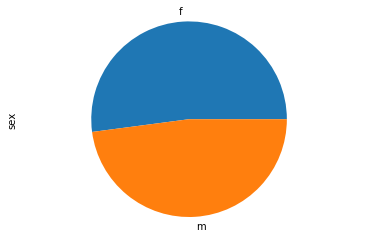

In [10]:
# 'sex' est une variable qualitative nous allons donc utiliser un diagramme en secteurs pour voir si d'autres
# valeurs que 'm' et 'f' apparaissent 
customers["sex"].value_counts(normalize=True).plot(kind='pie')
plt.axis('equal') 
plt.show()

In [11]:
# la variable 'sex' ne contient pas de valeur aberrante 

In [12]:
# on trie la variable 'age' avec la méthode .sort_values()
customers.sort_values(by='age', ascending=True).head()

,client_id,sex,age
6098,c_7830,f,18
8209,c_5316,f,18
7615,c_533,m,18
5642,c_5902,f,18
7613,c_6817,f,18


In [13]:
customers.sort_values(by='age', ascending=False).head()

,client_id,sex,age
4569,c_577,m,93
418,c_5302,m,93
2491,c_8362,f,93
7550,c_353,m,92
5138,c_7232,f,92


In [14]:
# la variable 'age' ne contient pas de valeur aberrante

In [15]:
# recherche du nombre d'éléments au sein de la table
len(customers)

8621

In [16]:
# détection et suppression des doublons au sein de la variable 'client_id'
customers.drop_duplicates(subset="client_id", keep='first', inplace=True)
len(customers)

8621

In [17]:
# au regard du nombre d'éléments  après traitement, il n'y a pas de doublon sur la variable 'client_id'
# donc notre table 'customers' ne contient plus, ni valeur manquante, ni valeur aberrante, ni doublon

# Traitement des valeurs manquantes, aberrantes et des doublons sur la table 'products'

In [18]:
# chargement et affichage de la table products
products = pd.read_csv("products.csv")
products.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [19]:
# recherche des valeurs manquantes
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
id_prod    3287 non-null object
price      3287 non-null float64
categ      3287 non-null int64
dtypes: float64(1), int64(1), object(1)
memory usage: 77.1+ KB


In [20]:
# la table 'products' ne contient donc pas de valeur manquante

In [21]:
# recherche des valeurs aberrantes
# on trie la variable 'id_prod' avec la méthode .sort_values()
products.sort_values(by='id_prod', ascending=True).head()

,id_prod,price,categ
1001,0_0,3.75,0
803,0_1,10.99,0
2691,0_10,17.95,0
663,0_100,20.60,0
922,0_1000,6.84,0


In [22]:
products.sort_values(by='id_prod', ascending=False).head()

,id_prod,price,categ
731,T_0,-1.00,0
3188,2_99,84.99,2
3088,2_98,149.74,2
2698,2_97,160.99,2
2576,2_96,47.91,2


In [23]:
# on remarque que la variable id_prod peut prendre en valeur 'T_0', qui nous renvoie à un test nous allons supprimer
# l'individu à l'aide d'un .loc
products = products.loc[~products.id_prod.str.startswith('T'), :]
products.sort_values(by='id_prod', ascending=False).head()

,id_prod,price,categ
3188,2_99,84.99,2
3088,2_98,149.74,2
2698,2_97,160.99,2
2576,2_96,47.91,2
966,2_95,98.99,2


In [24]:
# la variable 'id_prod' ne contient plus de valeur aberrante

In [25]:
# on trie la variable 'price' avec la méthode .sort_values()
products.sort_values(by='price', ascending=True).head()

,id_prod,price,categ
2272,0_528,0.62,0
2355,0_202,0.62,0
370,0_120,0.66,0
1211,0_1844,0.77,0
1530,0_1620,0.80,0


In [26]:
products.sort_values(by='price', ascending=False).head()

,id_prod,price,categ
947,2_2,300.00,2
724,2_76,254.44,2
394,2_158,247.22,2
1436,2_167,236.99,2
2779,2_30,233.54,2


In [27]:
# la variable 'price' ne contient pas de valeur aberrante

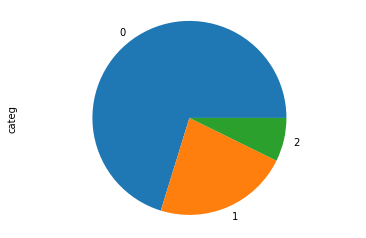

In [28]:
# 'categ' est une variable qualitative nous allons donc utiliser un diagramme en secteurs pour voir si d'autres
# valeurs que O, 1 et 2 apparaissent 
products["categ"].value_counts(normalize=True).plot(kind='pie')
plt.axis('equal') 
plt.show()

In [29]:
# la variable 'categ' ne contient pas de valeur aberrante

In [30]:
# recherche du nombre d'éléments au sein de la table
len(products)

3286

In [31]:
# détection et suppression des doublons au sein de la variable 'id_prod'
products.drop_duplicates(subset="id_prod", keep='first', inplace=True)
len(products)

3286

In [32]:
# au regard du nombre de lignes après traitement, il n'y a pas de doublon sur la variable 'products'
# donc notre variable ne contient plus, ni valeur manquante, ni valeur aberrante, ni doublon

# Traitement des valeurs manquantes, aberrantes et des doublons sur la table 'transactions'

In [33]:
# chargement et affichage de la table transactions
transactions = pd.read_csv("transactions.csv")
transactions.head()

,id_prod,date,session_id,client_id
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242


In [34]:
# recherche des valeurs manquantes au sein de la table 'transactions'
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337016 entries, 0 to 337015
Data columns (total 4 columns):
id_prod       337016 non-null object
date          337016 non-null object
session_id    337016 non-null object
client_id     337016 non-null object
dtypes: object(4)
memory usage: 10.3+ MB


In [35]:
# la table 'transactions' ne contient donc pas de valeur manquante

In [36]:
# recherche des valeurs aberrantes
# on trie la variable 'id_prod' avec la méthode .sort_values()
transactions.sort_values(by='id_prod', ascending=True).head()

,id_prod,date,session_id,client_id
207531,0_0,2022-02-08 23:42:35.771779,s_162168,c_3172
74507,0_0,2022-01-08 20:39:53.355563,s_146986,c_2300
151180,0_0,2021-05-28 00:34:12.578751,s_40470,c_8400
210010,0_0,2021-03-11 23:02:52.669621,s_5047,c_6730
103860,0_0,2021-11-14 20:56:12.067144,s_119692,c_4844


In [37]:
transactions.sort_values(by='id_prod', ascending=False).head()

,id_prod,date,session_id,client_id
210294,T_0,test_2021-03-01 02:30:02.237432,s_0,ct_0
75176,T_0,test_2021-03-01 02:30:02.237443,s_0,ct_1
203418,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_0
259192,T_0,test_2021-03-01 02:30:02.237444,s_0,ct_0
234706,T_0,test_2021-03-01 02:30:02.237441,s_0,ct_1


In [38]:
# on remarque que la variable id_prod peut prendre en valeur 'T_0', qui nous renvoie à un test nous allons 
# les supprimer à l'aide d'un .loc
transactions = transactions.loc[~transactions.id_prod.str.startswith('T'), :]
transactions.sort_values(by='id_prod', ascending=False).head()

,id_prod,date,session_id,client_id
65672,2_99,2021-11-21 01:53:46.967570,s_122697,c_5828
139355,2_99,2021-07-11 20:56:49.820935,s_61009,c_7135
326898,2_98,2021-03-08 21:10:32.250919,s_3637,c_5967
209271,2_97,2021-08-15 20:16:10.343556,s_76200,c_3331
284189,2_97,2021-04-06 19:09:32.897796,s_16930,c_5899


In [39]:
# on trie la variable 'date' avec la méthode .sort_values()
transactions.sort_values(by='date', ascending=True).head()

,id_prod,date,session_id,client_id
176588,0_1259,2021-03-01 00:01:07.843138,s_1,c_329
95285,0_1390,2021-03-01 00:02:26.047414,s_2,c_664
216737,0_1352,2021-03-01 00:02:38.311413,s_3,c_580
180767,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912
293481,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033


In [40]:
transactions.sort_values(by='date', ascending=False).head()

,id_prod,date,session_id,client_id
79892,0_1775,2022-02-28 23:59:58.040472,s_172423,c_1460
301528,0_1403,2022-02-28 23:59:02.381670,s_172423,c_1460
6245,0_1538,2022-02-28 23:57:12.741573,s_172424,c_1876
242599,1_370,2022-02-28 23:56:57.561424,s_172423,c_1460
208601,1_456,2022-02-28 23:56:57.196281,s_172422,c_5787


In [41]:
# la variable 'date' ne contient pas de valeur aberrante

In [42]:
# on trie la variable 'session_id' avec la méthode .sort_values()
transactions.sort_values(by='session_id', ascending=True).head()

,id_prod,date,session_id,client_id
176588,0_1259,2021-03-01 00:01:07.843138,s_1,c_329
309544,1_635,2021-03-01 00:10:33.163037,s_10,c_2218
42033,0_1451,2021-03-01 04:43:58.025677,s_100,c_3854
148924,0_1030,2021-03-01 04:12:43.572994,s_100,c_3854
328736,0_1590,2021-03-03 02:49:03.169115,s_1000,c_1014


In [43]:
transactions.sort_values(by='session_id', ascending=False).head()

,id_prod,date,session_id,client_id
143919,0_1411,2021-10-04 18:50:59.099942,s_99998,c_2795
251881,0_1572,2021-10-04 18:45:54.374885,s_99998,c_2795
8129,0_1604,2021-10-04 19:00:20.030388,s_99998,c_2795
91103,0_1197,2021-10-04 18:45:38.003516,s_99997,c_3521
195828,0_1475,2021-10-04 18:45:05.640783,s_99996,c_4900


In [44]:
# la variable 'session_id' ne contient pas de valeur aberrante

In [45]:
# on trie la variable 'client_id' avec la méthode .sort_values()
transactions.sort_values(by='client_id', ascending=True).head()

,id_prod,date,session_id,client_id
240351,1_425,2021-12-25 03:53:43.623598,s_139610,c_1
193879,0_2277,2021-09-06 18:34:16.975976,s_85977,c_1
83342,0_1429,2021-10-15 11:28:24.523566,s_105105,c_1
26295,1_364,2021-11-15 20:46:25.222740,s_120172,c_1
57766,0_513,2021-07-21 22:41:38.769525,s_65433,c_1


In [46]:
transactions.sort_values(by='client_id', ascending=False).head()

,id_prod,date,session_id,client_id
113798,0_1467,2021-12-17 03:28:47.129085,s_135545,c_999
77299,1_395,2021-08-23 16:44:27.072834,s_79695,c_999
328970,0_1426,2021-09-10 02:44:13.556163,s_87567,c_999
144925,1_381,2021-08-14 07:48:55.723362,s_75530,c_999
153027,1_251,2021-11-09 09:06:38.818975,s_116988,c_999


In [47]:
# la variable 'client_id' ne contient pas de valeur aberrante

In [48]:
# la table 'transactions' sera notre table d'association dans la future jointure
# nous allons tester nos clés primaires et étrangères avant 

In [49]:
# recherche de concordance ou non entre la variable 'id_prod' de la table 'transactions' et 'products'
missing_id_prod=transactions['id_prod'][~transactions['id_prod'].isin(products['id_prod'])]
missing_id_prod

6235      0_2245
10802     0_2245
14051     0_2245
17486     0_2245
21078     0_2245
21761     0_2245
22680     0_2245
24584     0_2245
30886     0_2245
31342     0_2245
34907     0_2245
35582     0_2245
37138     0_2245
37864     0_2245
41220     0_2245
42049     0_2245
44654     0_2245
48912     0_2245
50779     0_2245
52048     0_2245
53084     0_2245
53643     0_2245
57455     0_2245
59809     0_2245
60566     0_2245
69495     0_2245
75902     0_2245
86174     0_2245
87980     0_2245
88611     0_2245
           ...  
239973    0_2245
241518    0_2245
242285    0_2245
247426    0_2245
251277    0_2245
253222    0_2245
254085    0_2245
257923    0_2245
260265    0_2245
267698    0_2245
273302    0_2245
277022    0_2245
278702    0_2245
282533    0_2245
283516    0_2245
297223    0_2245
298334    0_2245
298550    0_2245
300905    0_2245
305604    0_2245
311651    0_2245
312637    0_2245
313042    0_2245
316295    0_2245
320653    0_2245
322710    0_2245
329417    0_2245
330490    0_22

In [50]:
# nous vérifions qu'il n'y a pas d'infos manquantes concernant cet individu au sein de la table 'transactions'
transactions.loc[transactions['id_prod']=='0_2245',:].head()

,id_prod,date,session_id,client_id
6235,0_2245,2021-06-17 03:03:12.668129,s_49705,c_1533
10802,0_2245,2021-06-16 05:53:01.627491,s_49323,c_7954
14051,0_2245,2021-11-24 17:35:59.911427,s_124474,c_5120
17486,0_2245,2022-02-28 18:08:49.875709,s_172304,c_4964
21078,0_2245,2021-03-01 00:09:29.301897,s_3,c_580


In [51]:
# notre table d'association est donc bien complète
# donc il s'agit d'un individu qui n'est pas référence dans la table 'products'
# nous savons qu'il s'agit d'un aticle du categ '0'
# pour déterminer son prix, nous allons calculer la moyenne des valeurs '0' de la variable 'categ' de la table 
#'products'

In [52]:
a = products.loc[products['categ'] == 0, :]
a.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
4,0_1507,3.99,0
5,0_1163,9.99,0


In [53]:
a['price'].mean()

11.732794627383296

In [54]:
# nous avons donc une moyenne de 'price' de 11.73€
# nous allons donc ajouter un nouvel individu à la table 'products'
new_products = pd.DataFrame([["0_2245",11.73,0]],columns=['id_prod','price','categ'])
products = pd.concat([products,new_products])

# nous vérifions la présence de ce nouvel individu dans la table 'products'
products.loc[products['id_prod']=='0_2245',:]

,id_prod,price,categ
0,0_2245,11.73,0


In [55]:
# recherche de concordance ou non entre la variable 'client_id' de la table 'transactions' et 'customers'
missing_client_id=transactions['client_id'][~transactions['client_id'].isin(customers['client_id'])]
missing_client_id

Series([], Name: client_id, dtype: object)

In [56]:
# les 2 clés contiennent bien les mêmes valeurs

In [57]:
# test sur le nombre des éléments de la table 'transactions' avant la jointure
transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336816 entries, 0 to 337015
Data columns (total 4 columns):
id_prod       336816 non-null object
date          336816 non-null object
session_id    336816 non-null object
client_id     336816 non-null object
dtypes: object(4)
memory usage: 12.8+ MB


In [58]:
# nous allons faire 1 jointure à gauche (c'est-à-dire sur la table 'transactions'), des tables 'products' et 
# 'customers'  
jointure = pd.merge(transactions, products, how='left', on='id_prod')
jointure = pd.merge(jointure, customers, how='left', on='client_id')
jointure.head()

,id_prod,date,session_id,client_id,price,categ,sex,age
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,4.99,0,f,45
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,65.75,2,f,22
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,10.71,1,f,43
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,4.20,0,m,59
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,8.99,0,f,42


In [59]:
# vérification du nombre d'éléments après la jointure 
jointure.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336816 entries, 0 to 336815
Data columns (total 8 columns):
id_prod       336816 non-null object
date          336816 non-null object
session_id    336816 non-null object
client_id     336816 non-null object
price         336816 non-null float64
categ         336816 non-null int64
sex           336816 non-null object
age           336816 non-null int64
dtypes: float64(1), int64(2), object(5)
memory usage: 23.1+ MB


In [60]:
# nous n'avons donc pas eu de perte ou de nouvelle données suite à la jointure

In [61]:
# exportation de la table sous format .csv
jointure.to_csv("jointure.csv", index = False)